In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, \
    mean_squared_error, r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from torch.nn.functional import grid_sample
from xgboost import XGBClassifier, XGBRegressor
from sklearn.linear_model import LinearRegression
from catboost import CatBoostRegressor, CatBoostClassifier

/Users/davidhristov/miniconda3/envs/myenvconda2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('datasets/obesity.csv')

In [5]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

In [6]:
df

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,2.000000,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,NaN
1,Female,18.000000,1.560000,57.000000,2.000000,3.000000,no,NaN,NaN,1.000000,Automobile,Normal_Weight
2,Female,18.000000,NaN,50.165754,NaN,1.411685,no,NaN,0.866045,NaN,Public_Transportation,Insufficient_Weight
3,NaN,20.952737,1.710730,131.274851,3.000000,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,NaN
4,Male,31.641081,1.914186,NaN,NaN,1.971472,no,NaN,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
20753,NaN,NaN,NaN,114.187096,2.919584,3.000000,no,2.151809,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,NaN,NaN,no,1.000000,NaN,NaN,NaN,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,2.407817,3.000000,no,2.000000,1.158040,1.198439,Public_Transportation,NaN
20756,NaN,33.852953,1.700000,83.520113,NaN,1.971472,NaN,2.144838,0.000000,NaN,NaN,NaN


,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.000000,0.976473,Public_Transportation,Obesity_Type_III
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,0,2.000000,1.000000,1.000000,Automobile,Normal_Weight
2,0,18.000000,1.700000,50.165754,2.392665,1.411685,0,2.000000,0.866045,0.573887,Public_Transportation,Insufficient_Weight
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,1.467863,0.780199,Public_Transportation,Obesity_Type_III
4,1,31.641081,1.914186,84.340406,2.392665,1.971472,0,2.000000,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,22.815416,1.700000,114.187096,2.919584,3.000000,0,2.151809,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,1,18.000000,1.710000,50.000000,2.392665,3.000000,0,1.000000,1.000000,0.573887,Public_Transportation,Insufficient_Weight
20755,1,20.101026,1.819557,105.580491,2.407817,3.000000,0,2.000000,1.158040,1.198439,Public_Transportation,Obesity_Type_III
20756,0,33.852953,1.700000,83.520113,2.392665,1.971472,0,2.144838,0.000000,0.573887,Public_Transportation,Obesity_Type_III


<Axes: >

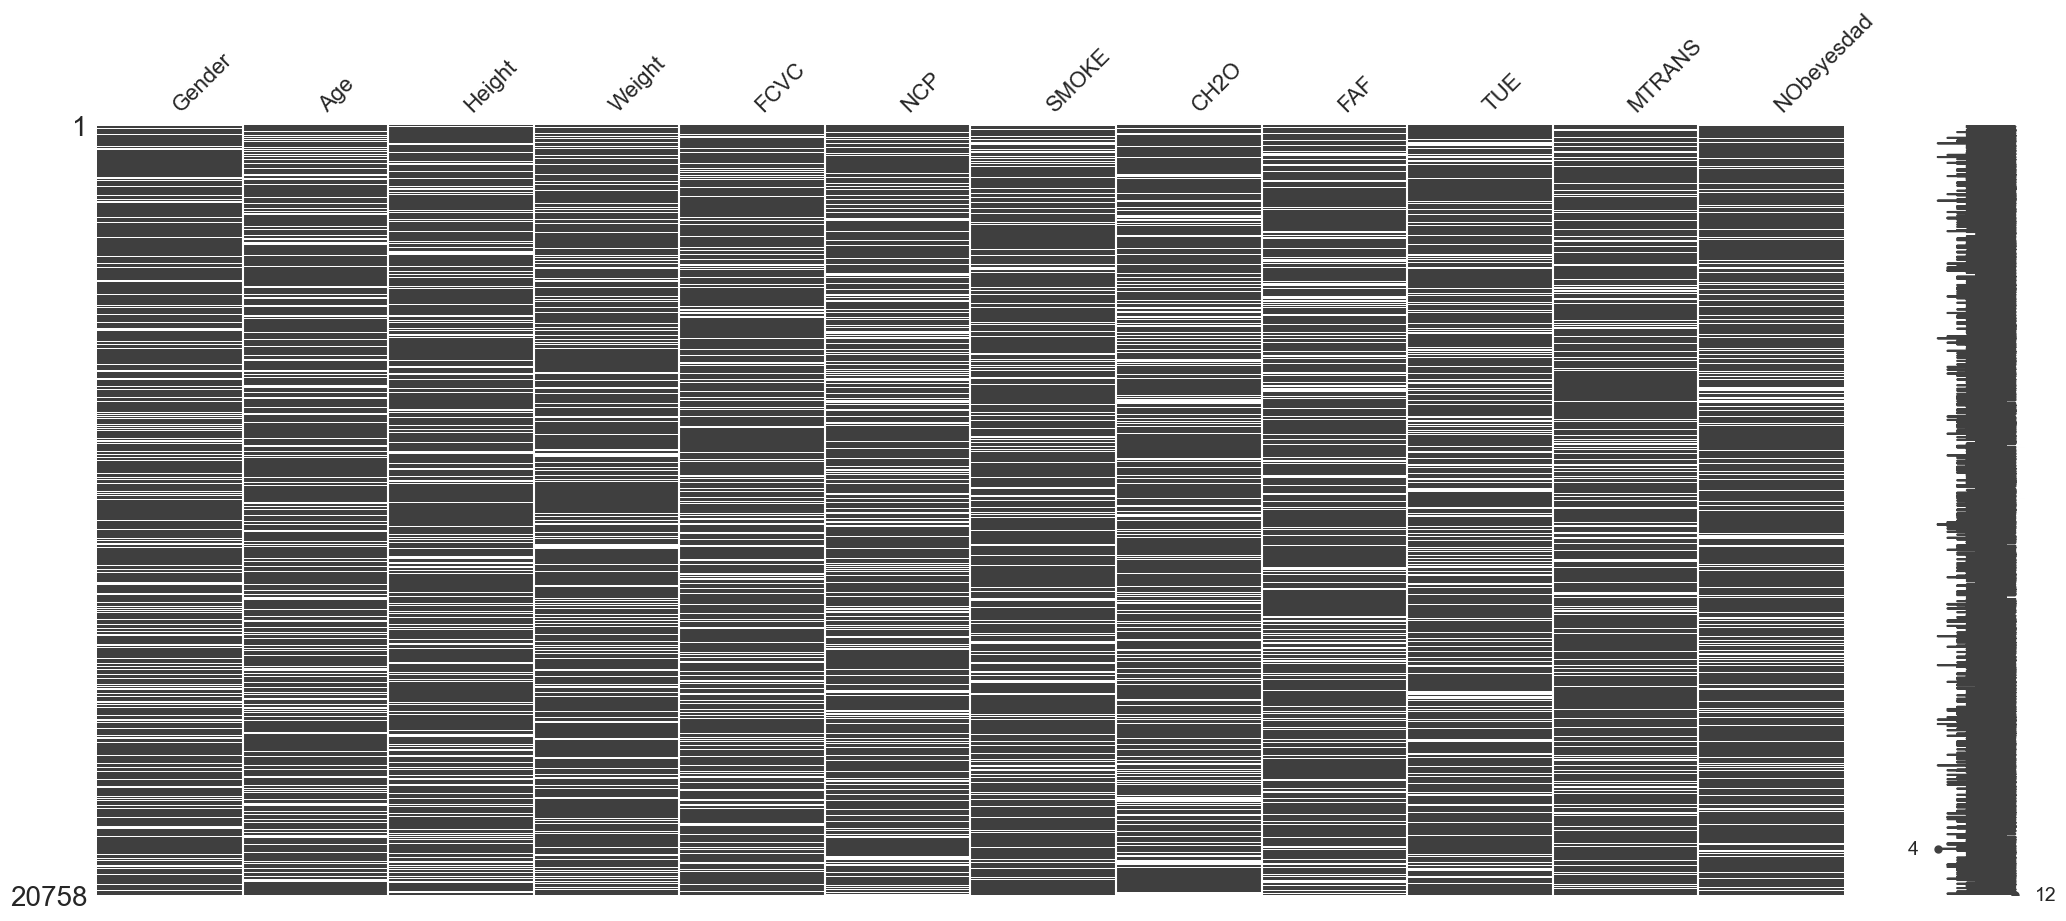

In [10]:
msno.matrix(df)

<Axes: >

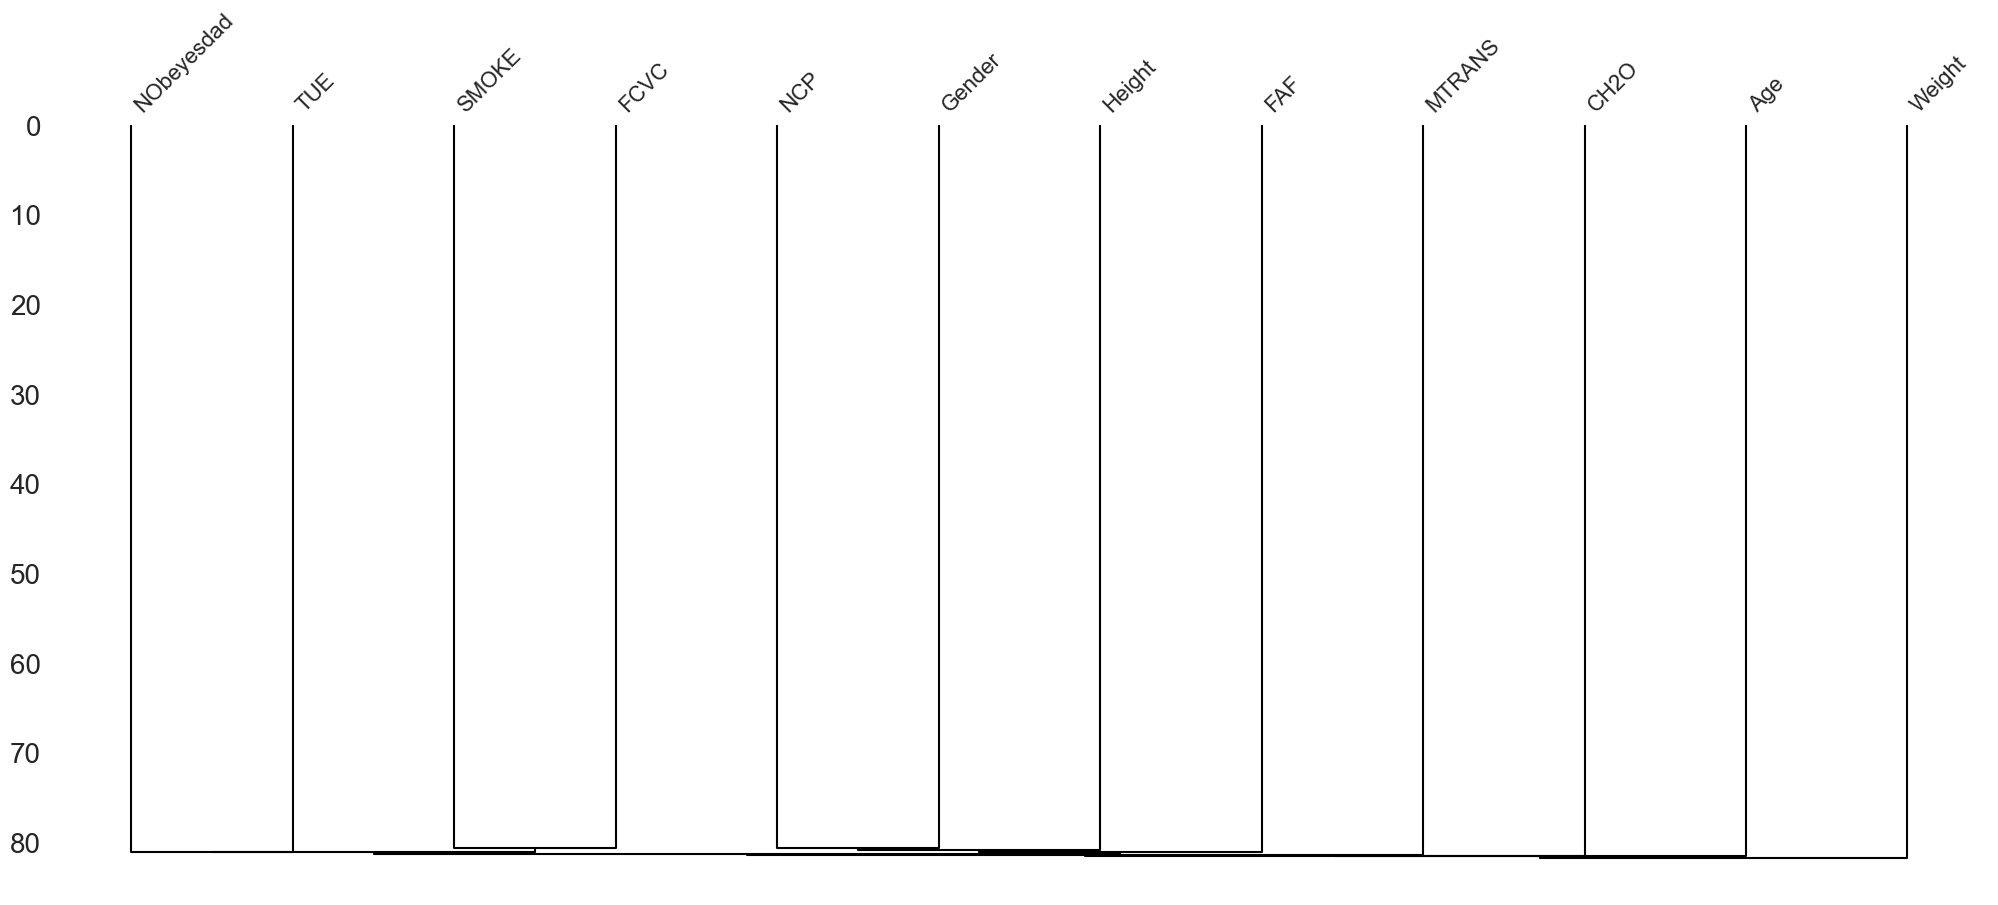

In [13]:
msno.dendrogram(df)

<Axes: >

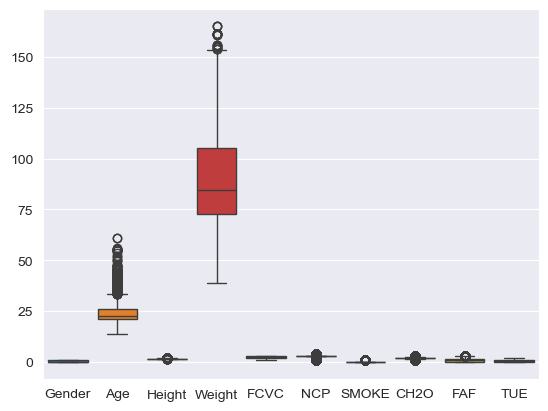

In [40]:
sns.boxplot(df)

In [42]:
df

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.000000,0.976473,Public_Transportation,Obesity_Type_III
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,0,2.000000,1.000000,1.000000,Automobile,Normal_Weight
2,0,18.000000,1.700000,50.165754,2.392665,1.411685,0,2.000000,0.866045,0.573887,Public_Transportation,Insufficient_Weight
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,1.467863,0.780199,Public_Transportation,Obesity_Type_III
4,1,31.641081,1.914186,84.340406,2.392665,1.971472,0,2.000000,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,22.815416,1.700000,114.187096,2.919584,3.000000,0,2.151809,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,1,18.000000,1.710000,50.000000,2.392665,3.000000,0,1.000000,1.000000,0.573887,Public_Transportation,Insufficient_Weight
20755,1,20.101026,1.819557,105.580491,2.407817,3.000000,0,2.000000,1.158040,1.198439,Public_Transportation,Obesity_Type_III
20756,0,33.852953,1.700000,83.520113,2.392665,1.971472,0,2.144838,0.000000,0.573887,Public_Transportation,Obesity_Type_III


In [15]:
df.isnull().mean()*100

Gender        19.867039
Age           19.992292
Height        19.708064
Weight        20.623374
FCVC          19.833317
NCP           19.563542
SMOKE         19.799595
CH2O          20.045284
FAF           19.939301
TUE           19.977840
MTRANS        20.030831
NObeyesdad    19.910396
dtype: float64

In [18]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

cat_cols = ['Gender', 'SMOKE', 'MTRANS', 'NObeyesdad']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

<Axes: >

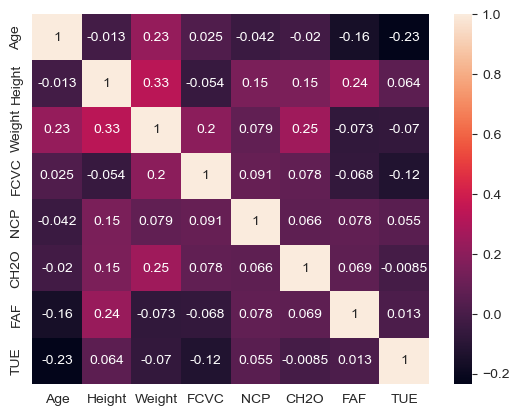

In [46]:
sns.heatmap(df[num_cols].corr(), annot=True)

In [19]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
FCVC          0
NCP           0
SMOKE         0
CH2O          0
FAF           0
TUE           0
MTRANS        0
NObeyesdad    0
dtype: int64

In [22]:
df

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,MTRANS,NObeyesdad
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,no,2.763573,0.000000,0.976473,Public_Transportation,Obesity_Type_III
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,no,2.000000,1.000000,1.000000,Automobile,Normal_Weight
2,0,18.000000,1.700000,50.165754,2.392665,1.411685,no,2.000000,0.866045,0.573887,Public_Transportation,Insufficient_Weight
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,no,1.674061,1.467863,0.780199,Public_Transportation,Obesity_Type_III
4,1,31.641081,1.914186,84.340406,2.392665,1.971472,no,2.000000,1.967973,0.931721,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,22.815416,1.700000,114.187096,2.919584,3.000000,no,2.151809,1.330519,0.196680,Public_Transportation,Obesity_Type_II
20754,1,18.000000,1.710000,50.000000,2.392665,3.000000,no,1.000000,1.000000,0.573887,Public_Transportation,Insufficient_Weight
20755,1,20.101026,1.819557,105.580491,2.407817,3.000000,no,2.000000,1.158040,1.198439,Public_Transportation,Obesity_Type_III
20756,0,33.852953,1.700000,83.520113,2.392665,1.971472,no,2.144838,0.000000,0.573887,Public_Transportation,Obesity_Type_III


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      20758 non-null  int64  
 1   Age         20758 non-null  float64
 2   Height      20758 non-null  float64
 3   Weight      20758 non-null  float64
 4   FCVC        20758 non-null  float64
 5   NCP         20758 non-null  float64
 6   SMOKE       20758 non-null  int64  
 7   CH2O        20758 non-null  float64
 8   FAF         20758 non-null  float64
 9   TUE         20758 non-null  float64
 10  MTRANS      20758 non-null  object 
 11  NObeyesdad  20758 non-null  object 
dtypes: float64(8), int64(2), object(2)
memory usage: 1.9+ MB


In [27]:
df['MTRANS'].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [28]:
df['NObeyesdad'].unique()

array(['Obesity_Type_III', 'Normal_Weight', 'Insufficient_Weight',
       'Overweight_Level_II', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [29]:
df_encoded = pd.get_dummies(data=df, columns=['MTRANS','NObeyesdad'])

In [30]:
df_encoded

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.000000,0.976473,...,False,True,False,False,False,False,False,True,False,False
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,0,2.000000,1.000000,1.000000,...,False,False,False,False,True,False,False,False,False,False
2,0,18.000000,1.700000,50.165754,2.392665,1.411685,0,2.000000,0.866045,0.573887,...,False,True,False,True,False,False,False,False,False,False
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,1.467863,0.780199,...,False,True,False,False,False,False,False,True,False,False
4,1,31.641081,1.914186,84.340406,2.392665,1.971472,0,2.000000,1.967973,0.931721,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,22.815416,1.700000,114.187096,2.919584,3.000000,0,2.151809,1.330519,0.196680,...,False,True,False,False,False,False,True,False,False,False
20754,1,18.000000,1.710000,50.000000,2.392665,3.000000,0,1.000000,1.000000,0.573887,...,False,True,False,True,False,False,False,False,False,False
20755,1,20.101026,1.819557,105.580491,2.407817,3.000000,0,2.000000,1.158040,1.198439,...,False,True,False,False,False,False,False,True,False,False
20756,0,33.852953,1.700000,83.520113,2.392665,1.971472,0,2.144838,0.000000,0.573887,...,False,True,False,False,False,False,False,True,False,False


In [24]:
encoder = LabelEncoder()

df['Gender'] = encoder.fit_transform(df['Gender'])
df['SMOKE'] = encoder.fit_transform(df['SMOKE'])

In [31]:
df_encoded

,Gender,Age,Height,Weight,FCVC,NCP,SMOKE,CH2O,FAF,TUE,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,1,24.443011,1.699998,81.669950,2.000000,2.983297,0,2.763573,0.000000,0.976473,...,False,True,False,False,False,False,False,True,False,False
1,0,18.000000,1.560000,57.000000,2.000000,3.000000,0,2.000000,1.000000,1.000000,...,False,False,False,False,True,False,False,False,False,False
2,0,18.000000,1.700000,50.165754,2.392665,1.411685,0,2.000000,0.866045,0.573887,...,False,True,False,True,False,False,False,False,False,False
3,0,20.952737,1.710730,131.274851,3.000000,3.000000,0,1.674061,1.467863,0.780199,...,False,True,False,False,False,False,False,True,False,False
4,1,31.641081,1.914186,84.340406,2.392665,1.971472,0,2.000000,1.967973,0.931721,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0,22.815416,1.700000,114.187096,2.919584,3.000000,0,2.151809,1.330519,0.196680,...,False,True,False,False,False,False,True,False,False,False
20754,1,18.000000,1.710000,50.000000,2.392665,3.000000,0,1.000000,1.000000,0.573887,...,False,True,False,True,False,False,False,False,False,False
20755,1,20.101026,1.819557,105.580491,2.407817,3.000000,0,2.000000,1.158040,1.198439,...,False,True,False,False,False,False,False,True,False,False
20756,0,33.852953,1.700000,83.520113,2.392665,1.971472,0,2.144838,0.000000,0.573887,...,False,True,False,False,False,False,False,True,False,False


In [33]:
x = df_encoded.drop(columns='FAF')
y = df_encoded['FAF']

In [34]:
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size=0.2)

In [35]:
model = XGBRegressor()

model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [36]:
y_pred = model.predict(x_test)

In [37]:
print(r2_score(y_test, y_pred))

0.2203299524821214


In [38]:
param_grid = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.05,0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
}

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, cv=5, scoring='r2', n_jobs = -1, verbose =1)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300}


In [39]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

print("R2:",r2_score(y_test, y_pred))
print("MSE:",mean_squared_error(y_test, y_pred))
print("MAE:",mean_absolute_error(y_test, y_pred))

R2: 0.2675157858653604
MSE: 0.39270419824991265
MAE: 0.4725765240915937
